# Handheld Gamma Ray Data
This notebook takes outputs from Radiation Solutions MODEL ### handheld gamma ray spectrometer and 
## Import packages

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt

# to make saved pdf figures have real text, not outlines
matplotlib.rcParams['pdf.fonttype'] = 42 
matplotlib.rcParams['ps.fonttype'] = 42

## Data preparation --> modify the csv output
- In Excel, do text to columns using semicolon delimiter
- Add column "Section" and put the section name in each row (if there are multiple sections, change the name)
- Add column "Height" to each row, from your field notes
- Save the csv file

## Now Change the two lines below to match your folder/file names 

In [ ]:
#Read into pandas DataFrames
datapath="/Users/zanejobe/Dropbox/python/GR/Chance/"
filename="assay_2263_FakeHeights.csv"



No handles with labels found to put in legend.


Text(0, 0.5, 'counts')

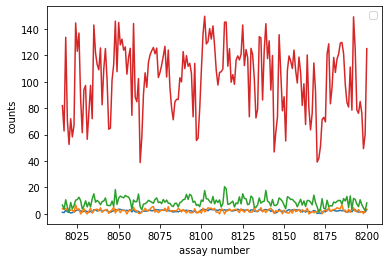

In [12]:
df = pd.read_csv(datapath + filename, delimiter=",", header=0, names=['id','date','time','temp','stabilized','totalppm','totalcpm','Kprc','Kcpm','Uppm','Ucpm','Thppm','Thcpm','dose','DoseUnits','lat','long','elev','Section','Height'])

#Make Gamma Ray API units (need reference for this)
df['GR']=19.6*df.Kprc+8.1*df.Uppm+4*df.Thppm

plt.plot(df.id,df.Kprc)
plt.plot(df.id,df.Uppm)
plt.plot(df.id,df.Thppm)
plt.plot(df.id,df.GR)
#plt.yscale('log')
plt.legend()
plt.xlabel('assay number')
plt.ylabel('counts')

In [26]:
df

,id,date,time,temp,stabilized,totalppm,totalcpm,Kprc,Kcpm,Uppm,...,Thppm,Thcpm,dose,DoseUnits,lat,long,elev,Section,Height,GR
0,8016,1/27/19,10:00:50,18.9,0,159.2,1314.5,1.2,90.4,3.9,...,6.7,12.5,6.2,uR/h,0,0,0,0,0.00,81.91
1,8017,1/27/19,10:00:50,20.1,1,149.2,1232.1,1.0,74.7,3.5,...,3.7,7.3,4.8,uR/h,0,0,0,0,0.25,62.75
2,8018,1/27/19,10:00:50,20.1,1,239.5,1977.8,2.9,182.4,4.2,...,10.7,19.8,10.2,uR/h,0,0,0,0,0.50,133.66
3,8019,1/27/19,10:00:50,20.1,1,139.1,1149.3,1.5,96.7,2.6,...,5.0,9.4,5.4,uR/h,0,0,0,0,0.75,70.46
4,8020,1/27/19,10:00:50,20.3,1,143.2,1182.7,1.3,80.0,2.7,...,1.3,3.1,3.9,uR/h,0,0,0,0,1.00,52.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,8196,1/27/19,10:00:50,21.3,1,183.5,1515.3,1.7,105.0,1.1,...,10.7,18.8,6.4,uR/h,0,0,0,1,40.75,85.03
181,8197,1/27/19,10:00:50,20.0,1,149.9,1238.3,1.7,105.0,1.9,...,6.9,12.5,5.8,uR/h,0,0,0,1,41.00,76.31
182,8198,1/27/19,10:00:50,20.4,1,116.9,965.5,1.5,84.1,0.2,...,4.6,8.3,3.8,uR/h,0,0,0,1,41.25,49.42
183,8199,1/27/19,10:00:50,20.5,1,142.8,1179.7,1.4,89.3,2.8,...,2.5,5.2,4.6,uR/h,0,0,0,1,41.50,60.12


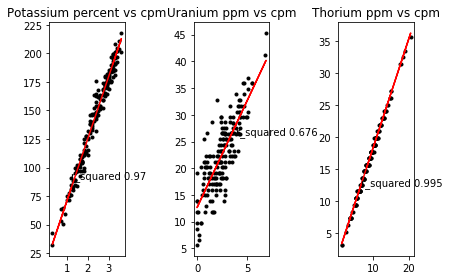

In [5]:
# quality check
fig = plt.figure()
ax1 = fig.add_subplot(131) # potassium
x1=df.Kprc
y1=df.Kcpm
slope, intercept, r_value, p_value, std_err = stats.linregress(x1,y1)
line = slope*x1+intercept
ax1.plot(x1,y1,'k.', x1, line,'r-')
ax1.text(x1[0],y1[0],'r_squared '+str(round(r_value**2,3)))
ax1.set_title('Potassium percent vs cpm')

ax2 = fig.add_subplot(132) # uranium
x1=df.Uppm
y1=df.Ucpm 
slope, intercept, r_value, p_value, std_err = stats.linregress(x1,y1)
line = slope*x1+intercept
ax2.plot(x1,y1,'k.', x1, line,'r-')
ax2.text(x1[0],y1[0],'r_squared '+str(round(r_value**2,3)))
ax2.set_title('Uranium ppm vs cpm')

ax3 = fig.add_subplot(133)
x1=df.Thppm
y1=df.Thcpm 
slope, intercept, r_value, p_value, std_err = stats.linregress(x1,y1)
line = slope*x1+intercept
ax3.plot(x1,y1,'k.', x1, line,'r-')
ax3.text(x1[0],y1[0],'r_squared '+str(round(r_value**2,3)))
ax3.set_title('Thorium ppm vs cpm')

plt.tight_layout()

## Check some test points

In [36]:
# check sand  values
ss1=df['GR'].iloc[1] # id 8017 
ss2=df['GR'].iloc[6] # id 8022
print(ss1,ss2)

62.75 58.290000000000006


In [35]:
# CHECK SHALE VALUES
sh1=df['GR'].iloc[2] # id 8018
sh2=df['GR'].iloc[10] # id 8026
print(sh1,sh2) 

133.66000000000003 136.87


In [40]:
print('Mean of sand is',np.mean([ss1,ss2]), '; mean of shale is',np.mean([sh1,sh2]))

Mean of sand is 60.52 ; mean of shale is 135.26500000000001


## Make some plots

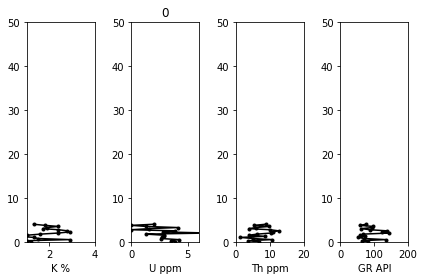

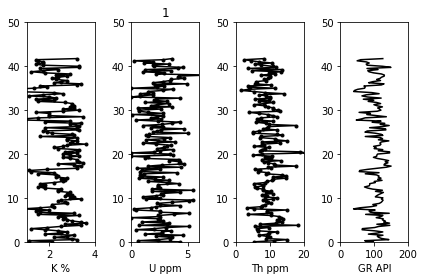

In [6]:
# plot depth vs GR

df_sort=df.sort_values(by=['Section', 'Height'])
dfs = dict(tuple(df_sort.groupby('Section')))
uniq=df_sort.Section.unique()
S1 = dfs[uniq[0]]
S2 = dfs[uniq[1]]

# SECTION 1
fig = plt.figure()
plt.rcParams['svg.fonttype'] = 'none'

ylim=[0,50]
xlimK=[1,4]
xlimU=[0,6]
xlimTh=[0,20]
xlimGR=[0,200]

ax1 = fig.add_subplot(141) 
ax1.plot(S1.Kprc,S1.Height,'k.-')
ax1.set_xlabel('K %')
ax1.set_ylim(ylim)
ax1.set_xlim(xlimK)

ax2 = fig.add_subplot(142) 
ax2.plot(S1.Uppm,S1.Height,'k.-')
ax2.set_xlabel('U ppm')
ax2.set_title(S1.Section.values[0])
ax2.set_ylim(ylim)
ax2.set_xlim(xlimU)

ax3 = fig.add_subplot(143) 
ax3.plot(S1.Thppm,S1.Height,'k.-')
ax3.set_xlabel('Th ppm')
ax3.set_ylim(ylim)
ax3.set_xlim(xlimTh)

ax4 = fig.add_subplot(144) 
ax4.plot(S1.GR,S1.Height,'k.-')
ax4.set_xlabel('GR API')
ax4.set_ylim(ylim)
ax4.set_xlim(xlimGR)

plt.tight_layout()
#plt.savefig(S1.Section.values[0] + ".pdf", transparent=True) 

###################
# SECTION 2

fig = plt.figure()
plt.rcParams['svg.fonttype'] = 'none'

ax1 = fig.add_subplot(141) 
ax1.plot(S2.Kprc,S2.Height,'k.-')
ax1.set_xlabel('K %')
ax1.set_ylim(ylim)
ax1.set_xlim(xlimK)

ax2 = fig.add_subplot(142) 
ax2.plot(S2.Uppm,S2.Height,'k.-')
ax2.set_xlabel('U ppm')
ax2.set_title(S2.Section.values[0])
ax2.set_ylim(ylim)
ax2.set_xlim(xlimU)

ax3 = fig.add_subplot(143) 
ax3.plot(S2.Thppm,S2.Height,'k.-')
ax3.set_xlabel('Th ppm')
ax3.set_ylim(ylim)
ax3.set_xlim(xlimTh)

ax4 = fig.add_subplot(144) 
ax4.plot(S2.GR,S2.Height,'k-')
ax4.set_xlabel('GR API')
ax4.set_ylim(ylim)
ax4.set_xlim(xlimGR)

plt.tight_layout()
plt.savefig("test.pdf", transparent=True) 